In [1]:
#first we will import pandas to read the csv file
import pandas as pd
#we use the read function of pandas to store the data frame into the variable birddata
birddata=pd.read_csv("bird_tracking.csv")

In [2]:
#.info() fucntion is used to get some basic info of the data frame
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
Unnamed: 0            61920 non-null int64
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [3]:
#this function is used to read and display the first 5 reading of the data
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [4]:
#importing matplotlib
import matplotlib.pyplot as plt

In [5]:
#importing numpy
import numpy as np

In [6]:
#We store all the data for the bird Eric into the variable x
a=birddata.bird_name=="Eric"

In [7]:
#this program is used to read the latitude and logitude of the bird eric
x,y=birddata.longitude[a], birddata.latitude[a]

In [8]:
#this function reads the size of the figure that will be drawn to present the data
plt.figure(figsize=(7,7))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

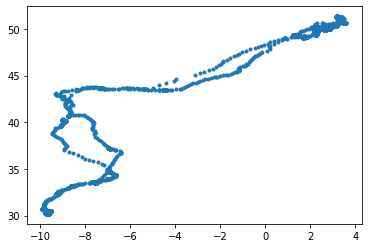

In [9]:
#the plt.plot function will print a graph made out of "."s
plt.plot(x,y,".")

In [10]:
#the pandas unique function can be used to extract the bird names
bird_names=pd.unique(birddata.bird_name)

In [11]:
#we can now look at the names of these birds
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

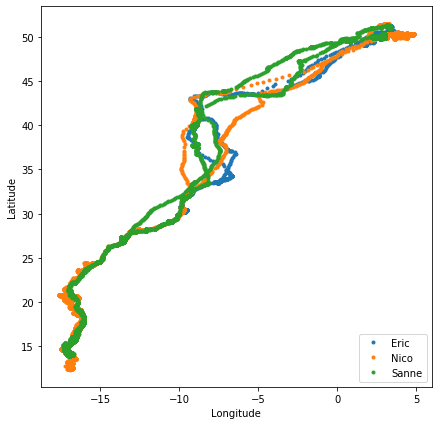

In [12]:
#Now we will represent the data of all three birds on one graph and it is for this reason that we make a for loop
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    a=birddata.bird_name==bird_name
    x,y=birddata.longitude[a], birddata.latitude[a]
    #here label helps us make a legend that will tell us what line is for what species
    plt.plot(x,y,".",label=bird_name)
#plt.label can be used to label the x and y axis of the graph
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.legend can be used to create a legend on the graph
plt.legend(loc="lower right")
#.savefig can be used to save a pdf of the figure
plt.savefig("3traj.pdf")

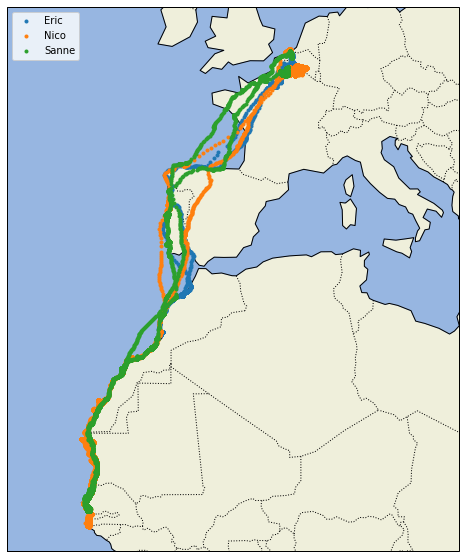

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj=ccrs.Mercator()

plt.figure(figsize=(10,10))
ax=plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for name in bird_names:
    ix=birddata['bird_name'] == name
    x, y= birddata.longitude[ix],birddata.latitude[ix]
    ax.plot(x,y, '.', transform=ccrs.Geodetic(), label=name)
    
plt.legend(loc="upper left")
plt.savefig("map.pdf")

In [15]:
Geodic("Eric")

NameError: name 'Geodic' is not defined